In [1]:
cd ..

/home/abhishekabhishek/git/UnsupGenModbyMPS


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp

from MPScumulant import MPS_c
import mps_circuit_helpers as helpers
import mps_circuit
import metrics

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load and format the data

In [19]:
data = np.load('BStest/BSdata.npy')
data_states = data.reshape(-1, 16).astype(np.int8)

Load the trained MPS

In [3]:
%autoreload
m = MPS_c(16, max_bond_dim=2)
m.loadMPS('BS-2-MPS')

# check the properties of the matrices in the MPS
for i in range(len(m.matrices)):
    tn_core = m.matrices[i]
    print(i, tn_core.shape)

0 (1, 2, 2)
1 (2, 2, 2)
2 (2, 2, 2)
3 (2, 2, 2)
4 (2, 2, 2)
5 (2, 2, 2)
6 (2, 2, 2)
7 (2, 2, 2)
8 (2, 2, 2)
9 (2, 2, 2)
10 (2, 2, 2)
11 (2, 2, 2)
12 (2, 2, 2)
13 (2, 2, 2)
14 (2, 2, 2)
15 (2, 2, 1)


In [6]:
m_pad = helpers.pad_mps(m)

# check the properties of the matrices in the paddded MPS
for i in range(len(m_pad.matrices)):
    tn_core = m_pad.matrices[i]
    print(i, tn_core.shape)

idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
i = 11, (2, 2, 2), 2
i = 12, (2, 2, 2), 2
i = 13, (2, 2, 2), 2
i = 14, (2, 2, 2), 2
0 (1, 2, 2)
1 (2, 2, 2)
2 (2, 2, 2)
3 (2, 2, 2)
4 (2, 2, 2)
5 (2, 2, 2)
6 (2, 2, 2)
7 (2, 2, 2)
8 (2, 2, 2)
9 (2, 2, 2)
10 (2, 2, 2)
11 (2, 2, 2)
12 (2, 2, 2)
13 (2, 2, 2)
14 (2, 2, 2)
15 (2, 2, 1)


In [7]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 2) True False
2 (2, 2, 2) True False
3 (2, 2, 2) True False
4 (2, 2, 2) True False
5 (2, 2, 2) True False
6 (2, 2, 2) True False
7 (2, 2, 2) True False
8 (2, 2, 2) True False
9 (2, 2, 2) True False
10 (2, 2, 2) True False
11 (2, 2, 2) True False
12 (2, 2, 2) True False
13 (2, 2, 2) True False
14 (2, 2, 2) False False
15 (2, 2, 1) False False


In [8]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad, reshape_axis=2)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) False False
1 (2, 2, 2) False False
2 (2, 2, 2) False False
3 (2, 2, 2) False False
4 (2, 2, 2) False False
5 (2, 2, 2) False False
6 (2, 2, 2) False False
7 (2, 2, 2) False False
8 (2, 2, 2) False False
9 (2, 2, 2) False False
10 (2, 2, 2) False False
11 (2, 2, 2) False False
12 (2, 2, 2) False False
13 (2, 2, 2) False False
14 (2, 2, 2) False False
15 (2, 2, 1) True True


In [9]:
# left canonicalize the padded MPS
m_pad.left_cano()

bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
bond: 11
bond: 12
bond: 13
bond: 14


In [10]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 2) True False
2 (2, 2, 2) True False
3 (2, 2, 2) True False
4 (2, 2, 2) True False
5 (2, 2, 2) True False
6 (2, 2, 2) True False
7 (2, 2, 2) True False
8 (2, 2, 2) True False
9 (2, 2, 2) True False
10 (2, 2, 2) True False
11 (2, 2, 2) True False
12 (2, 2, 2) True False
13 (2, 2, 2) True False
14 (2, 2, 2) True False
15 (2, 2, 1) True False


In [11]:
# check for isometries by reshaping along axis 0
helpers.are_isometries(m_pad, reshape_axis=2)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) False False
1 (2, 2, 2) False False
2 (2, 2, 2) False False
3 (2, 2, 2) False False
4 (2, 2, 2) False False
5 (2, 2, 2) False False
6 (2, 2, 2) False False
7 (2, 2, 2) False False
8 (2, 2, 2) False False
9 (2, 2, 2) False False
10 (2, 2, 2) False False
11 (2, 2, 2) False False
12 (2, 2, 2) False False
13 (2, 2, 2) False False
14 (2, 2, 2) False False
15 (2, 2, 1) False False


In [12]:
unitary_list = []
tn_cores = m_pad.matrices
for site_idx in range(len(tn_cores)):
    tn_core = tn_cores[site_idx]
    # this step assumes that the core tensor is a left isometry
    u_mat = helpers.isometry_to_unitary(tn_core.reshape(-1, tn_core.shape[2]))
    unitary_list.append(u_mat)

In [13]:
# check if all matrices in the list are unitaries
for mat in unitary_list:
    print(helpers.is_unitary(mat), mat.shape)

True (2, 2)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)
True (4, 4)


Trying to build the circuit going from left-top to right-bottom (with or without the first single-qubit unitary in the list)

In [17]:
truncated_unitary_list = unitary_list[1:]
n_wires = len(truncated_unitary_list) + 1
dev = qml.device("default.qubit", wires=n_wires, shots=None)

@qml.qnode(dev)
def mps_circ():
    for wire in range(n_wires-1):
        unitary = truncated_unitary_list[wire]
        n_qubits = int(np.log2(unitary.shape[0]))
        u_wires = [wire] + list(range(wire+1, wire+n_qubits, 1))
        qml.QubitUnitary(unitary, wires=u_wires)
        
    return qml.probs(wires=range(n_wires))

(<Figure size 1800x1700 with 1 Axes>, <Axes: >)

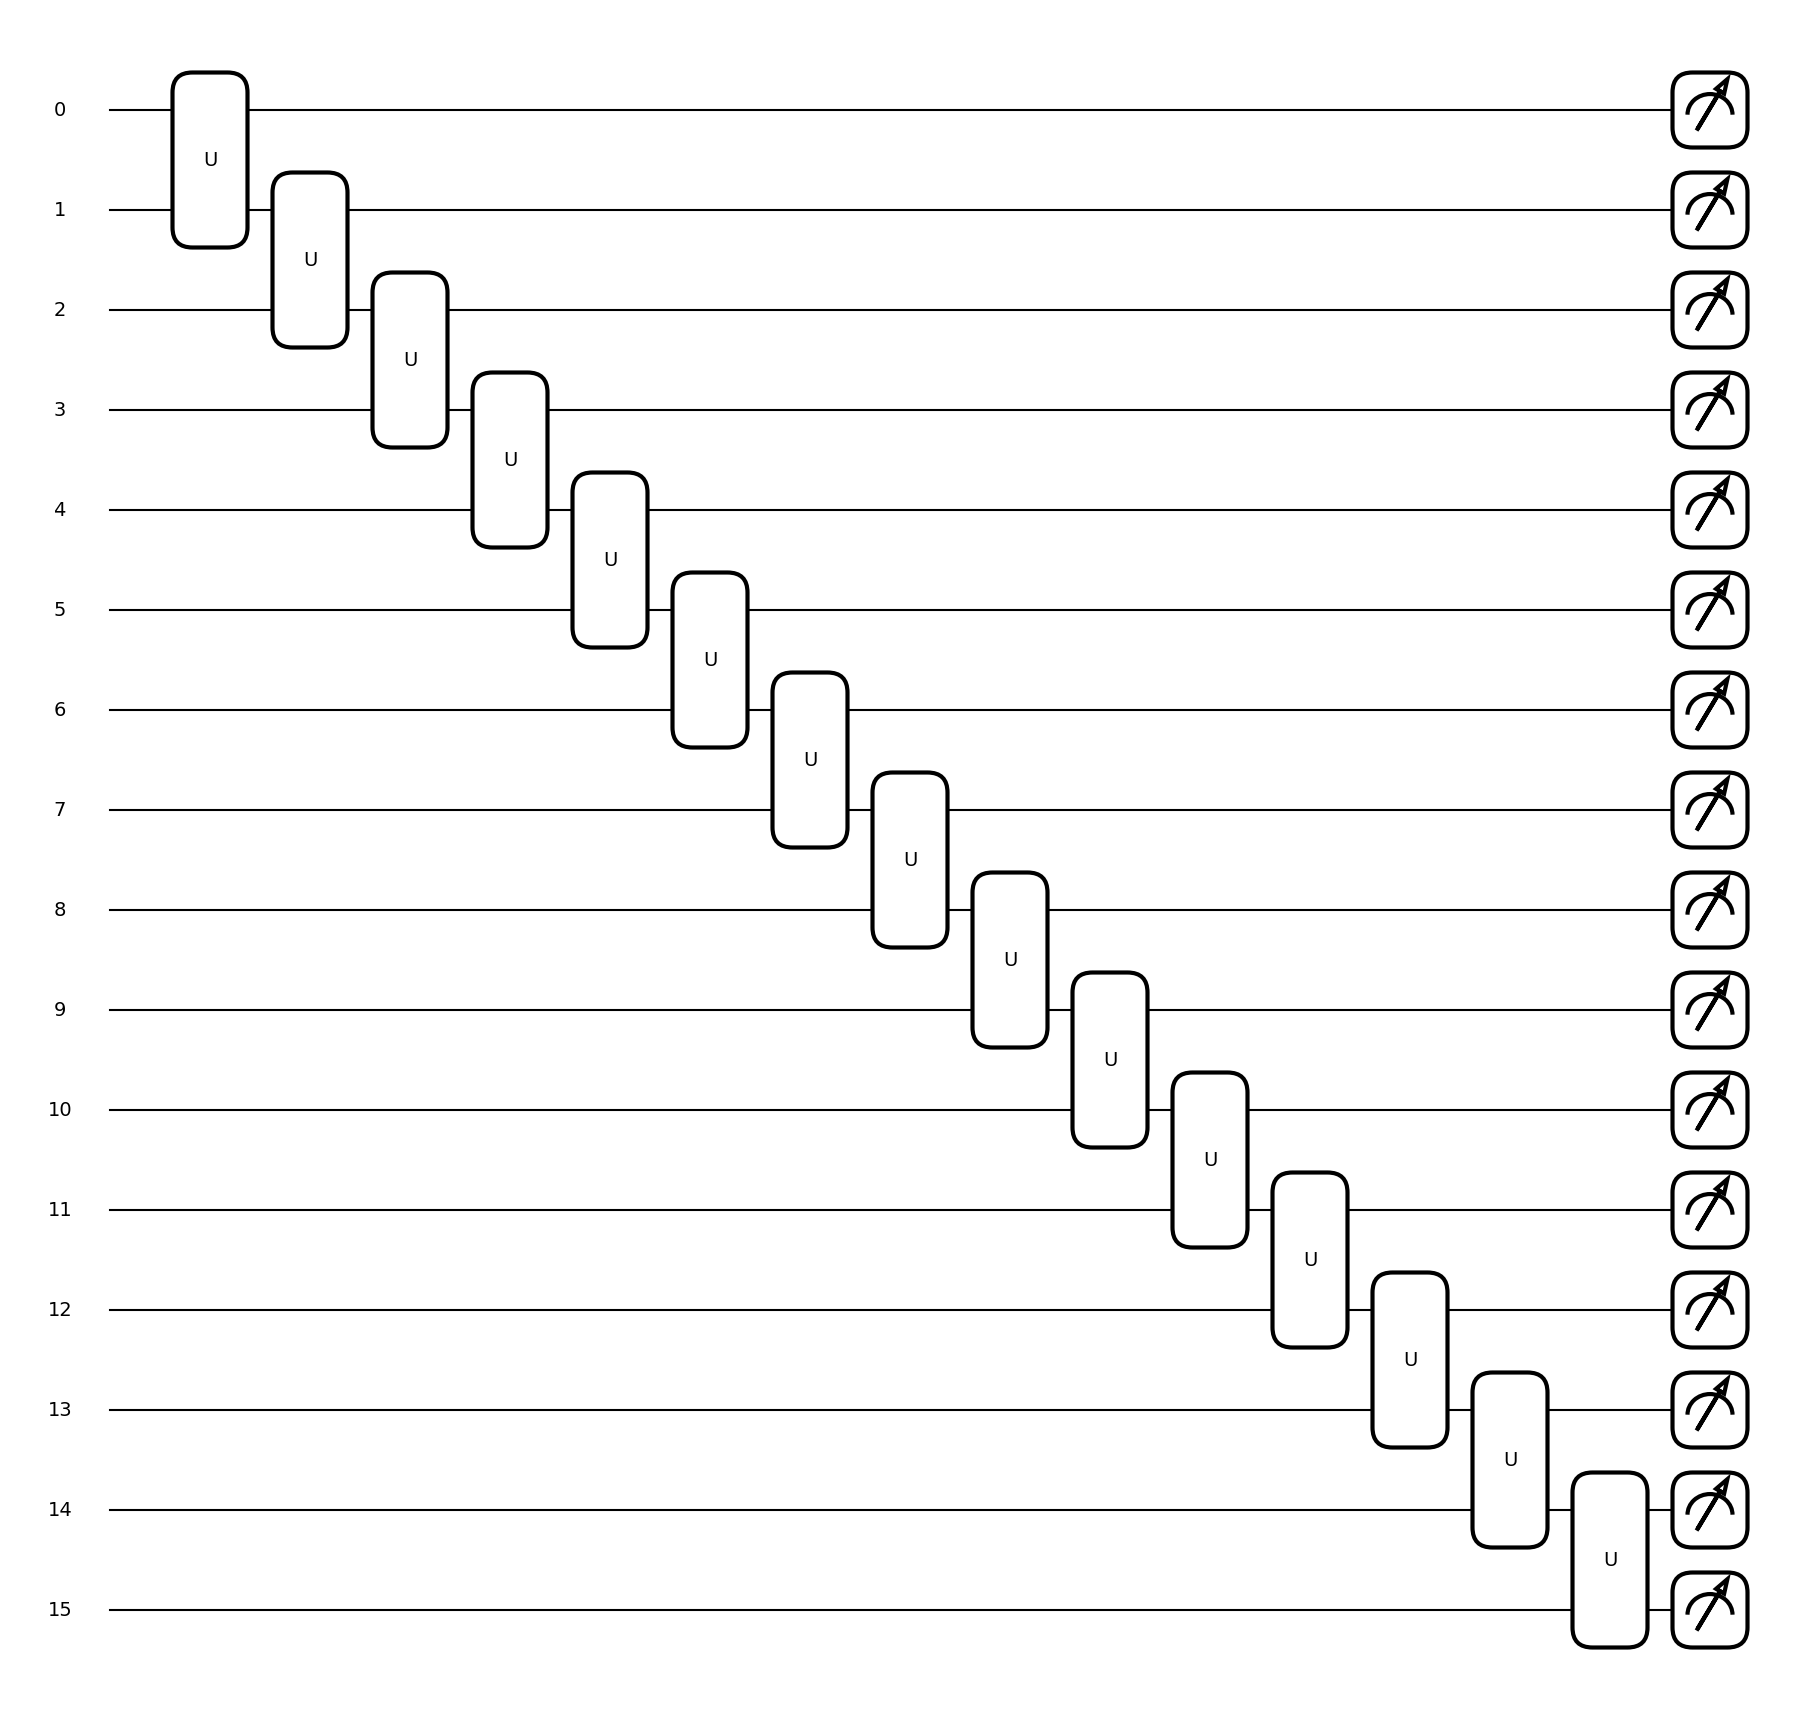

In [18]:
qml.drawer.draw_mpl(mps_circ)()

In [20]:
qc_probs = mps_circ()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

2023-04-11 16:21:29.123918: W external/org_tensorflow/tensorflow/compiler/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:0: failed initializing StreamExecutor for CUDA device ordinal 0: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 25429606400
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array(12.140255, dtype=float32)

MPS loss value

In [21]:
mps_probs_states = m.Give_probab(data_states)
metrics.kl_divergence_synergy_paper(30, mps_probs_states)

Array(5.105069, dtype=float32)

Try adding the single qubit gate at qubit 0

In [23]:
truncated_unitary_list = unitary_list[1:]
n_wires = len(truncated_unitary_list) + 1
dev = qml.device("default.qubit", wires=n_wires, shots=None)

@qml.qnode(dev)
def mps_circ():
    qml.QubitUnitary(unitary_list[0], wires=[0])
    for wire in range(n_wires-1):
        unitary = truncated_unitary_list[wire]
        n_qubits = int(np.log2(unitary.shape[0]))
        u_wires = [wire] + list(range(wire+1, wire+n_qubits, 1))
        qml.QubitUnitary(unitary, wires=u_wires)
        
    return qml.probs(wires=range(n_wires))

(<Figure size 1900x1700 with 1 Axes>, <Axes: >)

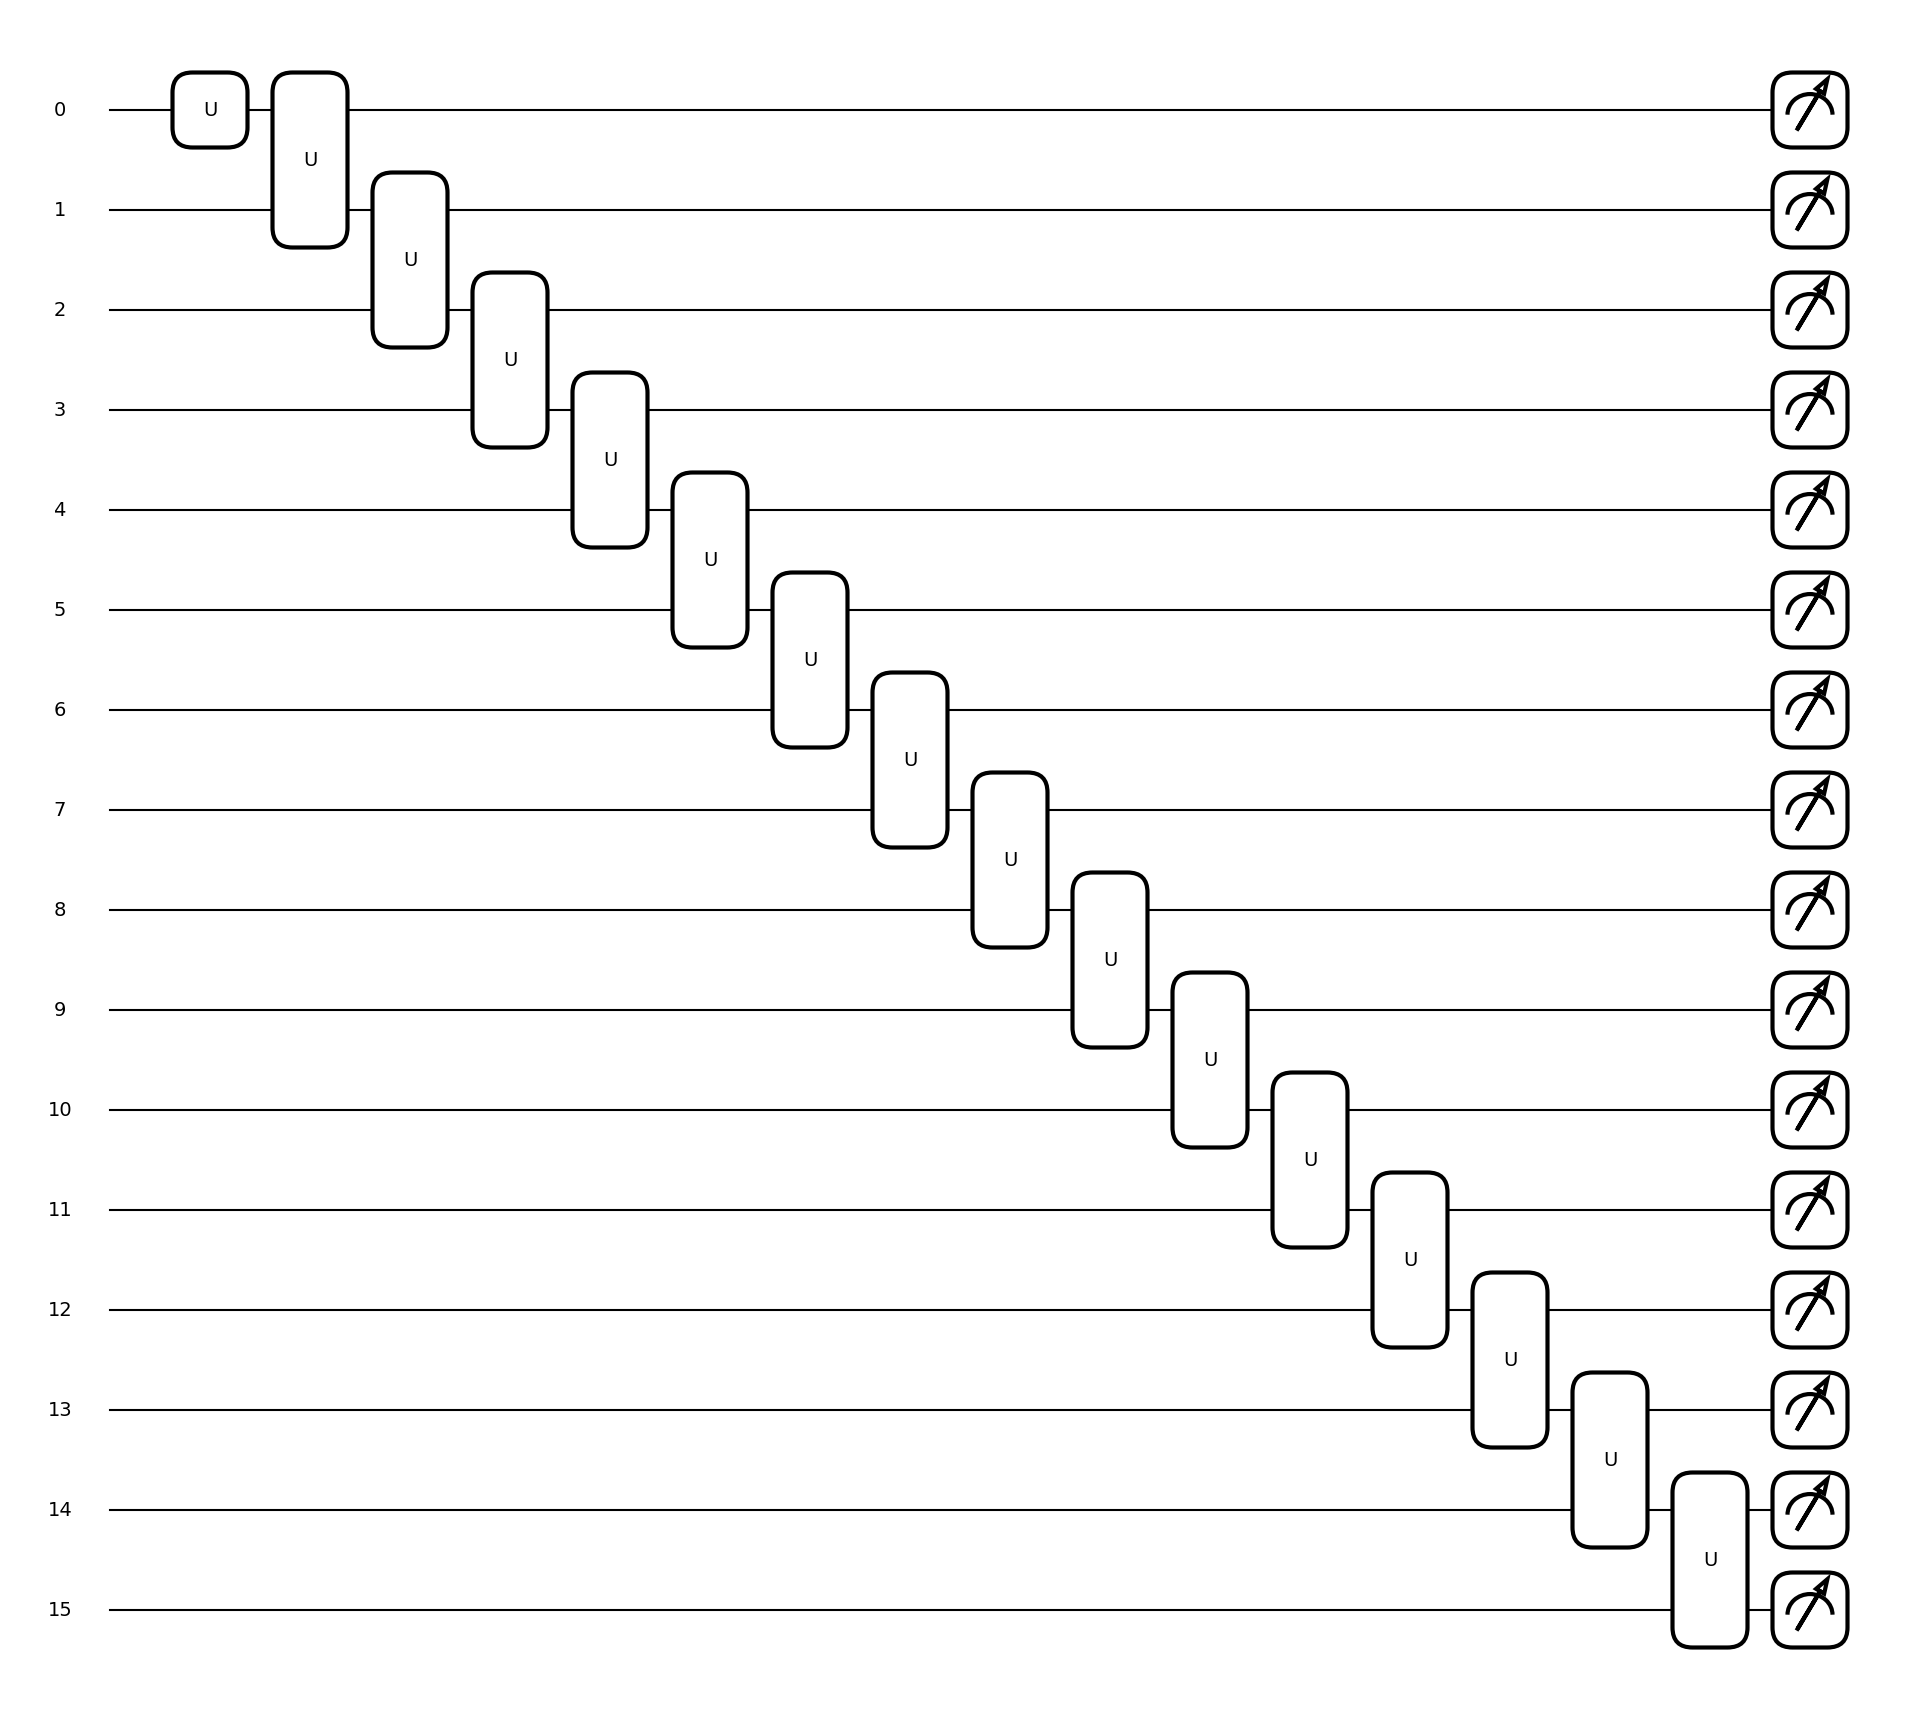

In [24]:
qml.drawer.draw_mpl(mps_circ)()

In [25]:
qc_probs = mps_circ()
filter_qc_probs = metrics.filter_probs(qc_probs, data_states)
metrics.kl_divergence_synergy_paper(30, filter_qc_probs)

Array(12.017186, dtype=float32)